<a href="https://colab.research.google.com/github/yongminkim0501/Image_deep/blob/main/image_label_generate_json.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model

In [2]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
cd /content/drive/MyDrive/data_ai/

/content/drive/MyDrive/data_ai


In [4]:
dataset_path = "/content/drive/MyDrive/data_ai/"
json_path = dataset_path + "019.data/1.Training/"
original_path = dataset_path + "019.data_original/"

In [5]:
import json

with open(json_path+"BLD00001_PS3_K3A_NIA0276.json") as json_file:
  json_load = json.load(json_file)

print(json.dumps(json_load, indent='\t'))

{
	"type": "FeatureCollection",
	"features": [
		{
			"type": "Feature",
			"geometry": {
				"type": "Polygon",
				"coordinates": [
					[
						31.434703,
						30.041395,
						0.0
					],
					[
						31.440543,
						30.041465,
						0.0
					],
					[
						31.440463,
						30.046545,
						0.0
					],
					[
						31.434623,
						30.046476,
						0.0
					]
				]
			},
			"properties": {
				"object_imcoords": "EMPTY",
				"building_imcoords": "856.295264, 1000.804698, 828.008311, 1024.000000, 879.970214, 1023.864715, 878.740347, 1015.25564",
				"road_imcoords": "EMPTY",
				"image_id": "BLD00001_PS3_K3A_NIA0276.png",
				"ingest_time": "2023-03-02T14:34:14.313313Z",
				"type_id": "1",
				"type_name": "\uac74\ubb3c"
			}
		},
		{
			"type": "Feature",
			"geometry": {
				"type": "Polygon",
				"coordinates": [
					[
						31.434703,
						30.041395,
						0.0
					],
					[
						31.440543,
						30.041465,
						0.0
					],
					[
						31.440463,
						30.046545,
						

In [6]:
import cv2

img = cv2.imread("/content/drive/MyDrive/data_ai/019.data_original/BLD00001_PS3_K3A_NIA0276.png")
img = cv2.resize(img, (256,256))

697.565715, 727.686315, 690.491938, 745.256665, 691.861056, 757.350542, 719.015233, 770.357165, 729.968179, 776.518197, 740.921124, 762.142456, 753.243188, 736.129211, 751.189511, 728.142688, 744.041289, 720.778640, 732.046486, 718.052548, 722.959513, 727.321260, 708.965576, 720.960379, 703.513393, 725.86734
26
[[697.565715, 727.686315], [690.491938, 745.256665], [691.861056, 757.350542], [719.015233, 770.357165], [729.968179, 776.518197], [740.921124, 762.142456], [753.243188, 736.129211], [751.189511, 728.142688], [744.041289, 720.77864], [732.046486, 718.052548], [722.959513, 727.32126], [708.965576, 720.960379], [703.513393, 725.86734]]
[[697 727]
 [690 745]
 [691 757]
 [719 770]
 [729 776]
 [740 762]
 [753 736]
 [751 728]
 [744 720]
 [732 718]
 [722 727]
 [708 720]
 [703 725]]


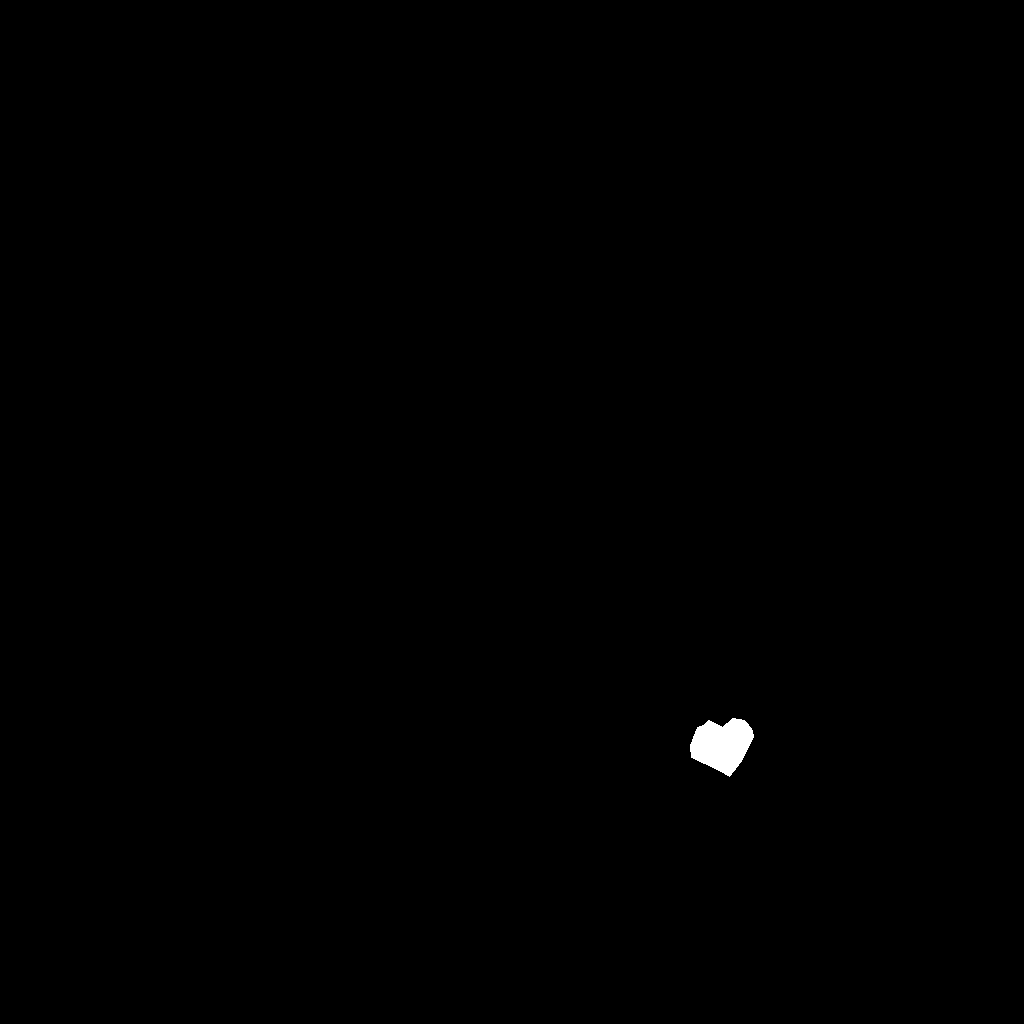

In [7]:
import numpy as np
from google.colab.patches import cv2_imshow

label = np.zeros((256,256), np.uint8)
pts1 = []
pts2 = []
json_load["features"][0]["geometry"]["coordinates"]

for i in range(0,3):
    vvv = []
    for j in range(0,3):
      vvv.append(int(json_load["features"][0]["geometry"]["coordinates"][i][j]))
    vvv.pop()
    pts1.append(vvv)
# size = 1024 1024 -> 나중에 타입 맞추기

vv = json_load["features"][50]["properties"]["building_imcoords"]
print(vv)
a = vv.split(", ")
print(len(a))
pts = []
for i in range(0,int(len(a)/2)):
  vvv = []
  vvv.append(float(a[2*i]))
  vvv.append(float(a[2*i+1]))
  pts.append(vvv)
print(pts)
for i in range(0,int(len(a)/2)):
  for j in range(2):
    pts[i][j] = int(pts[i][j])
pts = np.array(pts)
print(pts)
#vvv = np.array(vvv)
pts2 = np.array(pts2)

img = np.zeros((1024, 1024, 3), np.uint8)

img = cv2.fillPoly(img, [pts],(255,255,255))
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

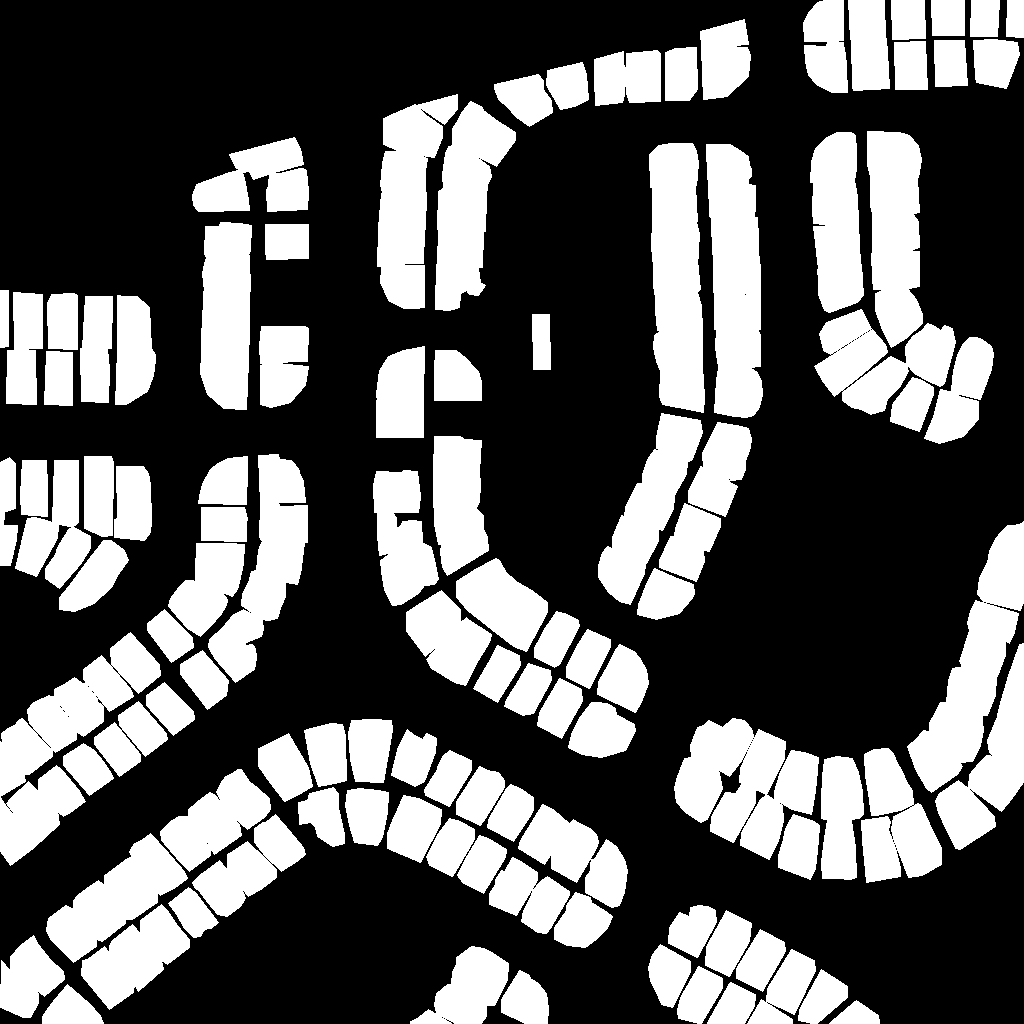

In [8]:
img = np.zeros((1024, 1024, 3), np.uint8)
count = 0

for number in range(len(json_load["features"])):
  vv = json_load["features"][number]["properties"]["building_imcoords"]
  a = vv.split(", ")

  pts = []
  for i in range(0,int(len(a)/2)):
    vvv = []
    vvv.append(float(a[2*i]))
    vvv.append(float(a[2*i+1]))
    pts.append(vvv)

  for i in range(0,int(len(a)/2)):
    for j in range(2):
      pts[i][j] = int(pts[i][j])
  pts = np.array(pts)

  img = cv2.fillPoly(img, [pts],(255,255,255))
data_name = f"img_{count}"

cv2.imwrite(f'/content/drive/MyDrive/data_ai/019.data/1.Training/label_data/{data_name}.png', img)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [9]:
cd /content/drive/MyDrive/data_ai

/content/drive/MyDrive/data_ai


In [10]:
import pandas as pd
train_csv = pd.read_csv("list_building_pub4_modi.csv", header = None)
train_data = train_csv.iloc[:, 0].tolist()
print(train_data)
# for i in range(5):
#   #print(json_path + train_csv_head[i] + ".json")

['BLD00001_PS3_K3A_NIA0276', 'BLD00002_PS3_K3A_NIA0276', 'BLD00004_PS3_K3A_NIA0276', 'BLD00006_PS3_K3A_NIA0276', 'BLD00007_PS3_K3A_NIA0276', 'BLD00008_PS3_K3A_NIA0276', 'BLD00010_PS3_K3A_NIA0276', 'BLD00011_PS3_K3A_NIA0276', 'BLD00013_PS3_K3A_NIA0276', 'BLD00017_PS3_K3A_NIA0276', 'BLD00018_PS3_K3A_NIA0276', 'BLD00024_PS3_K3A_NIA0276', 'BLD00029_PS3_K3A_NIA0276', 'BLD00030_PS3_K3A_NIA0276', 'BLD00031_PS3_K3A_NIA0276', 'BLD00032_PS3_K3A_NIA0276', 'BLD00033_PS3_K3A_NIA0276', 'BLD00034_PS3_K3A_NIA0276', 'BLD00038_PS3_K3A_NIA0276', 'BLD00039_PS3_K3A_NIA0276', 'BLD00044_PS3_K3A_NIA0276', 'BLD00047_PS3_K3A_NIA0276', 'BLD00048_PS3_K3A_NIA0276', 'BLD00049_PS3_K3A_NIA0276', 'BLD00051_PS3_K3A_NIA0276', 'BLD00052_PS3_K3A_NIA0276', 'BLD00053_PS3_K3A_NIA0276', 'BLD00054_PS3_K3A_NIA0276', 'BLD00056_PS3_K3A_NIA0276', 'BLD00057_PS3_K3A_NIA0276', 'BLD00058_PS3_K3A_NIA0276', 'BLD00061_PS3_K3A_NIA0276', 'BLD00074_PS3_K3A_NIA0276', 'BLD00075_PS3_K3A_NIA0276', 'BLD00076_PS3_K3A_NIA0276', 'BLD00077_PS3_K3A_N

In [ ]:
# import cv2

# img = cv2.imread("/content/drive/MyDrive/data_ai/019.data_original/BLD00001_PS3_K3A_NIA0276.png")
# img = cv2.resize(img, (256,256))

# img_data = []
# for dic in train_data:
#   img = cv2.imread("/content/drive/MyDrive/data_ai/019.data_original/"+ dic + ".png")
#   img_data.append(img)

In [11]:
import json
from google.colab.patches import cv2_imshow
import numpy as np

import pandas as pd
train_csv = pd.read_csv("list_building_pub4_modi.csv", header = None)
train_data = train_csv.iloc[:, 0]

print(train_data[0])

for i in range(5):
  print(json_path + train_data[i] + ".json")

json_load_1 = []
for i in range(4):
  with open(json_path + train_data[i] + ".json") as json_file:
    json_load_1.append(json.load(json_file))
json_load = json_load_1[0]
q = json_load
pts = []
gts = []
for key in q.keys() :
  if key == 'features':
    d = q[key][0]
    for key in d.keys():
      if key == 'geometry':
        s = d[key]
        for key in s.keys():
          a = s['coordinates']
          for i in range(3):
            geo = []
            for j in range(len(a[i])):
              geo.append(a[i][j])
            pts.append(geo)
    t = q['features'][1]
    for key in t.keys():
      if key == 'properties':
        s = d[key]
        for key in s.keys():
          if key == 'building_imcoords':
            a = s[key]
            a = a.split(", ")
            for i in range(len(a)):
              gts.append(float(a[i]))
            for i in range(len(gts)):
              gts[i] = int(gts[i])
pts = np.array(pts)
gts = np.array(gts)

print(pts)
print(gts)

BLD00001_PS3_K3A_NIA0276
/content/drive/MyDrive/data_ai/019.data/1.Training/BLD00001_PS3_K3A_NIA0276.json
/content/drive/MyDrive/data_ai/019.data/1.Training/BLD00002_PS3_K3A_NIA0276.json
/content/drive/MyDrive/data_ai/019.data/1.Training/BLD00004_PS3_K3A_NIA0276.json
/content/drive/MyDrive/data_ai/019.data/1.Training/BLD00006_PS3_K3A_NIA0276.json
/content/drive/MyDrive/data_ai/019.data/1.Training/BLD00007_PS3_K3A_NIA0276.json
[[31.434703 30.041395  0.      ]
 [31.440543 30.041465  0.      ]
 [31.440463 30.046545  0.      ]
 [31.434703 30.041395  0.      ]
 [31.440543 30.041465  0.      ]
 [31.440463 30.046545  0.      ]]
[ 856 1000  828 1024  879 1023  878 1015]


In [12]:
import os
dataset_path = "/content/drive/MyDrive/data_ai/"
png_list = os.listdir("/content/drive/MyDrive/data_ai/019.data_original")

for i in range (len(png_list)):
  png_list[i] = png_list[i].split(".")

png_t = []
for i in range (len(png_list)):
  if png_list[i][1] == 'png':
    png_t.append(png_list[i][0])

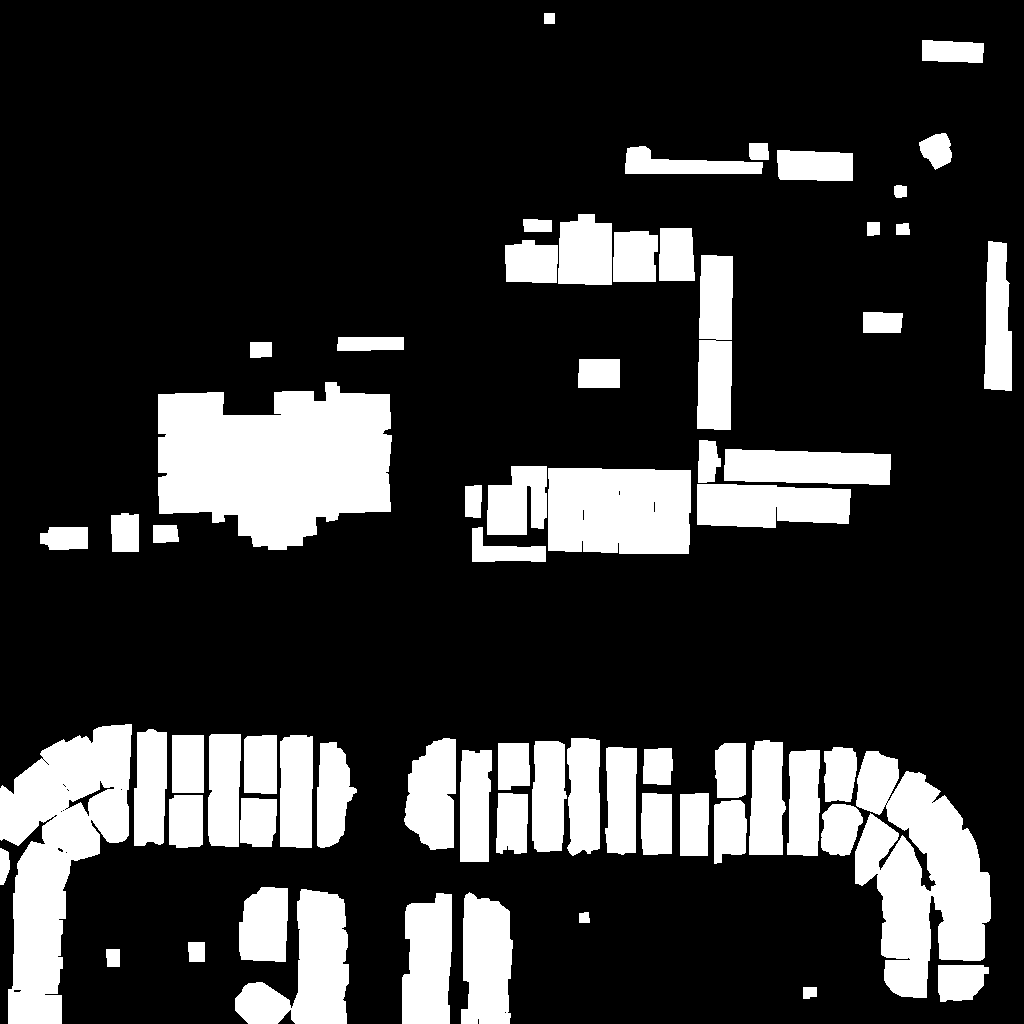

In [22]:
import json
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd
import cv2
import json

json_load1 = []
img1 = []

import os
dataset_path = "/content/drive/MyDrive/data_ai/"
png_list = os.listdir("/content/drive/MyDrive/data_ai/019.data_original")

for i in range (len(png_list)):
  png_list[i] = png_list[i].split(".")

png_t = []
for i in range (len(png_list)):
  if png_list[i][1] == 'png':
    png_t.append(png_list[i][0])

for item in png_t:
  img = np.zeros((1024, 1024, 3), np.uint8)
  with open(json_path+f"{item}.json") as json_file:
    json_load = json.load(json_file)
    json.dumps(json_load, indent='\t')
  for number in range(len(json_load["features"])):
    vv = json_load["features"][number]["properties"]["building_imcoords"]
    a = vv.split(", ")

    pts = []
    for i in range(0,int(len(a)/2)):
      vvv = []
      vvv.append(float(a[2*i]))
      vvv.append(float(a[2*i+1]))
      pts.append(vvv)

    for i in range(0,int(len(a)/2)):
      for j in range(2):
        pts[i][j] = int(pts[i][j])
    pts = np.array(pts)
    img = cv2.fillPoly(img, [pts],(255,255,255))
  cv2.imwrite(f'/content/drive/MyDrive/data_ai/019.data/1.Training/label_data/{item}.png', img)

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [30]:
#img1은 생성한 label image를 저장한 파일
import os
dataset_path = "/content/drive/MyDrive/data_ai/"
png_list = os.listdir("/content/drive/MyDrive/data_ai/019.data_original")

for i in range (len(png_list)):
  png_list[i] = png_list[i].split(".")

png_t = []
png_path = []

for i in range (len(png_list)):
  if png_list[i][1] == 'png':
    png_path.append(png_list[i][0]+"."+png_list[i][1])
    png_t.append(png_list[i][0])

img_list = []

for path in png_t:
  img = cv2.imread(f"/content/drive/MyDrive/data_ai/019.data_original/{path}.png")
  img.resize((224,224))
  img_list.append(img)

In [ ]:
import json
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd
import cv2
import json

json_load1 = []
img1 = []

import os
dataset_path = "/content/drive/MyDrive/data_ai/"
png_list = os.listdir("/content/drive/MyDrive/data_ai/019.data_original")

for i in range (len(png_list)):
  png_list[i] = png_list[i].split(".")

png_t = []
for i in range (len(png_list)):
  if png_list[i][1] == 'png':
    png_t.append(png_list[i][0])

for item in png_t:
#  img = np.zeros((1024, 1024, 3), np.uint8)
  img =
  with open(json_path+f"{item}.json") as json_file:
    json_load = json.load(json_file)
    json.dumps(json_load, indent='\t')
  for number in range(len(json_load["features"])):
    vv = json_load["features"][number]["properties"]["building_imcoords"]
    a = vv.split(", ")

    pts = []
    for i in range(0,int(len(a)/2)):
      vvv = []
      vvv.append(float(a[2*i]))
      vvv.append(float(a[2*i+1]))
      pts.append(vvv)

    for i in range(0,int(len(a)/2)):
      for j in range(2):
        pts[i][j] = int(pts[i][j])
    pts = np.array(pts)
    img = cv2.fillPoly(img, [pts],(255,255,255))
  cv2.imwrite(f'/content/drive/MyDrive/data_ai/019.data/1.Training/label_data/{item}.png', img)

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import json
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd
import cv2
import json

json_load1 = []
img1 = []

import os
dataset_path = "/content/drive/MyDrive/data_ai/"
png_list = os.listdir("/content/drive/MyDrive/data_ai/019.data_original")

for i in range (len(png_list)):
  png_list[i] = png_list[i].split(".")

png_t = []
for i in range (len(png_list)):
  if png_list[i][1] == 'png':
    png_t.append(png_list[i][0])

for item in png_t:
  img = cv2.imread(f"/content/drive/MyDrive/data_ai/019.data_original/{item}.png")
  img = cv2.resize(img, (1024,1024))
#  img = np.zeros((1024, 1024, 3), np.uint8)
  with open(json_path+f"{item}.json") as json_file:
    json_load = json.load(json_file)
    json.dumps(json_load, indent='\t')
  for number in range(len(json_load["features"])):
    vv = json_load["features"][number]["properties"]["building_imcoords"]
    a = vv.split(", ")

    pts = []
    for i in range(0,int(len(a)/2)):
      vvv = []
      vvv.append(float(a[2*i]))
      vvv.append(float(a[2*i+1]))
      pts.append(vvv)

    for i in range(0,int(len(a)/2)):
      for j in range(2):
        pts[i][j] = int(pts[i][j])
    pts = np.array(pts)
    img = cv2.fillPoly(img, [pts],(255,255,255))
  cv2.imwrite(f'/content/drive/MyDrive/data_ai/019.data/1.Training/label_data_in_picture/{item}.png', img)

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

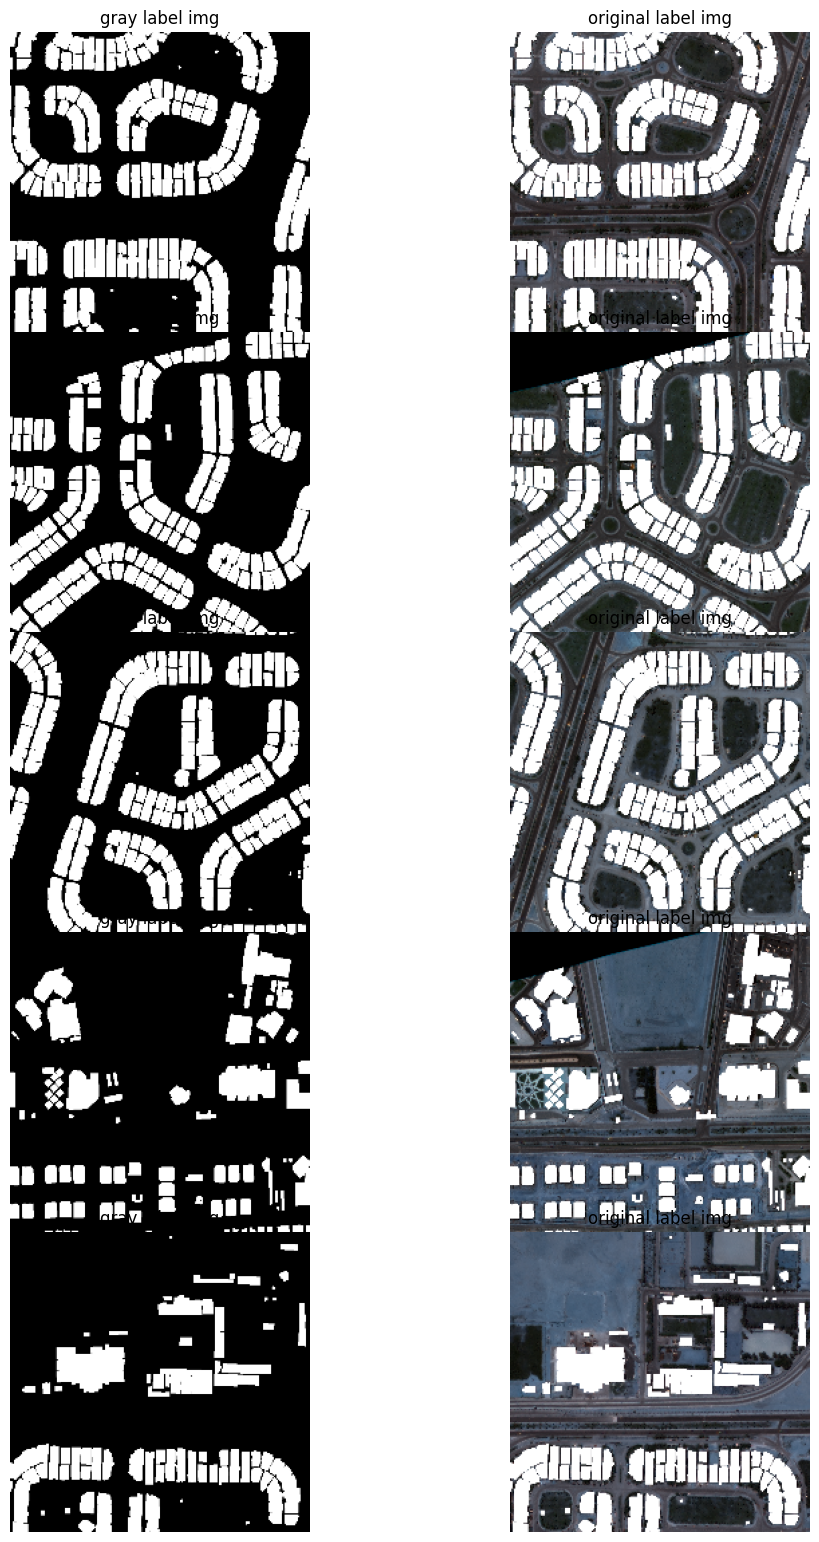

In [51]:
import matplotlib.pyplot as plt
import cv2
label_image_black_white = []
label_origin_image = []

for name in png_t:
  img = cv2.imread(f"/content/drive/MyDrive/data_ai/019.data/1.Training/label_data/{name}.png")
  img = cv2.resize(img, (224, 224))
  label_image_black_white.append(img)

  img = cv2.imread(f"/content/drive/MyDrive/data_ai/019.data/1.Training/label_data_in_picture/{name}.png")
  img = cv2.resize(img, (224, 224))
  label_origin_image.append(img)

fig, axs = plt.subplots(5, 2, figsize=(10, 15))
plt.subplots_adjust(left=0, right=1, top=1, bottom=0, hspace=0, wspace=0)
for i in range(len(label_image_black_white)):
  axs[i][0].imshow(label_image_black_white[i], cmap='gray')
  axs[i][0].axis('off')
  axs[i][0].set_title("gray label img")

  axs[i][1].imshow(label_origin_image[i])
  axs[i][1].axis('off')
  axs[i][1].set_title("original label img")

plt.show()